In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train_df = pd.read_csv('data/train.csv', sep=';')
test_df = pd.read_csv('data/test.csv', sep=';')

In [24]:
train_df.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,max_speed_kph,lanes,lanes_forward,lanes_backward,busway,highway,concat_mulai_akhir,distance
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126,48.28032,3,2,1,0,trunk,2.140000e+17,7.914363
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576,48.28032,4,1,1,2,primary,1.680000e+18,19.984653
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587,32.18688,2,1,1,0,secondary,2.650000e+17,44.684593
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063,32.18688,3,1,1,1,primary,1.110000e+19,82.340453
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336,48.28032,2,1,1,0,primary,5.940000e+19,29.117877


In [25]:
train_df.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,max_speed_kph,lanes,lanes_forward,lanes_backward,busway,highway,concat_mulai_akhir,distance
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126,48.28032,3,2,1,0,trunk,2.140000e+17,7.914363
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576,48.28032,4,1,1,2,primary,1.680000e+18,19.984653
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587,32.18688,2,1,1,0,secondary,2.650000e+17,44.684593
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063,32.18688,3,1,1,1,primary,1.110000e+19,82.340453
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336,48.28032,2,1,1,0,primary,5.940000e+19,29.117877


In [26]:
train_df.columns

Index(['waktu_setempat', 'id_jalan', 'id_titik_mulai', 'id_titik_akhir',
       'rerata_kecepatan', 'max_speed_kph', 'lanes', 'lanes_forward',
       'lanes_backward', 'busway', 'highway', 'concat_mulai_akhir',
       'distance'],
      dtype='object')

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127489 entries, 0 to 127488
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  127489 non-null  int64  
 1   waktu_setempat      127489 non-null  object 
 2   id_jalan            127489 non-null  int64  
 3   id_titik_mulai      127489 non-null  int64  
 4   id_titik_akhir      127489 non-null  int64  
 5   max_speed_kph       127489 non-null  float64
 6   lanes               127489 non-null  int64  
 7   lanes_forward       127489 non-null  int64  
 8   lanes_backward      127489 non-null  int64  
 9   busway              127489 non-null  int64  
 10  highway             127489 non-null  object 
 11  concat_mulai_akhir  127489 non-null  object 
 12  distance            127489 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 12.6+ MB


In [28]:
import pandas as pd

# Assuming you have your grouped data in a DataFrame called 'grouped_data'
# with columns 'id_jalan', 'id_titik_mulai', 'id_titik_akhir', 'waktu_setempat', and 'rerata_kecepatan'

# Define a function to interpolate missing values linearly
def interpolate_hourly(group):
    group['waktu_setempat'] = pd.to_datetime(group['waktu_setempat'])  # Convert to datetime if not already
    
    # Resample to hourly frequency
    group = group.set_index('waktu_setempat')
    group = group.resample('1H').first()
    
    # Linearly interpolate the 'rerata_kecepatan' column
    group['rerata_kecepatan'] = group['rerata_kecepatan'].interpolate(method='linear')
    
    # Reset index and forward fill non-'rerata_kecepatan' columns
    group = group.reset_index()
    group[['id_jalan', 'id_titik_mulai', 'id_titik_akhir', 'max_speed_kph', 'lanes', 'lanes_forward', 'lanes_backward', 'busway', 'highway', 'concat_mulai_akhir', 'distance']] = group[['id_jalan', 'id_titik_mulai', 'id_titik_akhir', 'max_speed_kph', 'lanes', 'lanes_forward', 'lanes_backward', 'busway', 'highway', 'concat_mulai_akhir', 'distance']].ffill()
    
    return group

# Apply the interpolation function to each group
train_df = train_df.groupby(['id_jalan', 'id_titik_mulai', 'id_titik_akhir', 'max_speed_kph', 'lanes', 'lanes_forward', 'lanes_backward', 'busway', 'highway', 'concat_mulai_akhir', 'distance']).apply(interpolate_hourly)

# Reset the index
train_df.reset_index(drop=True, inplace=True)


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492157 entries, 0 to 492156
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   waktu_setempat      492157 non-null  datetime64[ns, UTC]
 1   id_jalan            492157 non-null  float64            
 2   id_titik_mulai      492157 non-null  float64            
 3   id_titik_akhir      492157 non-null  float64            
 4   rerata_kecepatan    492157 non-null  float64            
 5   max_speed_kph       492157 non-null  float64            
 6   lanes               492157 non-null  float64            
 7   lanes_forward       492157 non-null  float64            
 8   lanes_backward      492157 non-null  float64            
 9   busway              492157 non-null  float64            
 10  highway             492157 non-null  object             
 11  concat_mulai_akhir  492157 non-null  float64            
 12  distance        

In [30]:
train_df.to_csv('Data/Train interpolasi.csv', index=False)

In [31]:
test_df.columns

Index(['id', 'waktu_setempat', 'id_jalan', 'id_titik_mulai', 'id_titik_akhir',
       'max_speed_kph', 'lanes', 'lanes_forward', 'lanes_backward', 'busway',
       'highway', 'concat_mulai_akhir', 'distance'],
      dtype='object')

In [32]:
train_df['waktu_setempat'] = pd.to_datetime(train_df['waktu_setempat']).dt.tz_localize(None)
test_df['waktu_setempat'] = pd.to_datetime(test_df['waktu_setempat']).dt.tz_localize(None)

In [33]:
train_df['hour'] = train_df['waktu_setempat'].dt.hour
train_df['week'] = train_df['waktu_setempat'].dt.isocalendar().week
train_df['day_of_week'] = train_df['waktu_setempat'].dt.dayofweek
train_df['day_of_month'] = train_df['waktu_setempat'].dt.day
train_df['is_weekend'] = (train_df['waktu_setempat'].dt.dayofweek >= 5).astype(int)
train_df['week'] = train_df['week'].astype(int)

In [34]:
test_df['hour'] = test_df['waktu_setempat'].dt.hour
test_df['week'] = test_df['waktu_setempat'].dt.isocalendar().week
test_df['day_of_week'] = test_df['waktu_setempat'].dt.dayofweek
test_df['day_of_month'] = test_df['waktu_setempat'].dt.day
test_df['is_weekend'] = (test_df['waktu_setempat'].dt.dayofweek >= 5).astype(int)
test_df['week'] = test_df['week'].astype(int)

In [35]:
train_df = pd.get_dummies(train_df, columns=['highway'], prefix='highway')
test_df = pd.get_dummies(test_df, columns=['highway'], prefix='highway')

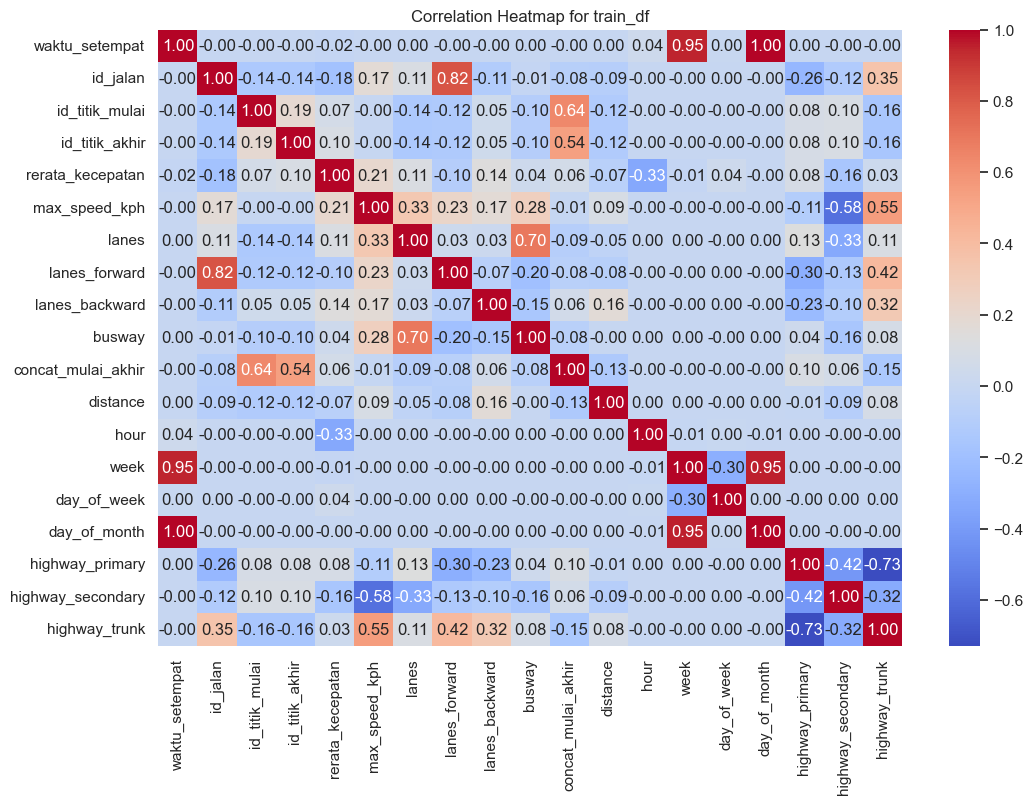

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame as 'train_df'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for train_df")
plt.show()

In [37]:
train_df = pd.get_dummies(train_df, columns=['id_jalan'], prefix='id_jalan')
test_df = pd.get_dummies(test_df, columns=['id_jalan'], prefix='id_jalan')

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492157 entries, 0 to 492156
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   waktu_setempat        492157 non-null  datetime64[ns]
 1   id_titik_mulai        492157 non-null  float64       
 2   id_titik_akhir        492157 non-null  float64       
 3   rerata_kecepatan      492157 non-null  float64       
 4   max_speed_kph         492157 non-null  float64       
 5   lanes                 492157 non-null  float64       
 6   lanes_forward         492157 non-null  float64       
 7   lanes_backward        492157 non-null  float64       
 8   busway                492157 non-null  float64       
 9   concat_mulai_akhir    492157 non-null  float64       
 10  distance              492157 non-null  float64       
 11  hour                  492157 non-null  int32         
 12  week                  492157 non-null  int32         
 13 

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127489 entries, 0 to 127488
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  127489 non-null  int64         
 1   waktu_setempat      127489 non-null  datetime64[ns]
 2   id_titik_mulai      127489 non-null  int64         
 3   id_titik_akhir      127489 non-null  int64         
 4   max_speed_kph       127489 non-null  float64       
 5   lanes               127489 non-null  int64         
 6   lanes_forward       127489 non-null  int64         
 7   lanes_backward      127489 non-null  int64         
 8   busway              127489 non-null  int64         
 9   concat_mulai_akhir  127489 non-null  object        
 10  distance            127489 non-null  float64       
 11  hour                127489 non-null  int32         
 12  week                127489 non-null  int32         
 13  day_of_week         127489 no

In [40]:
train_df.drop(columns=['busway', 'waktu_setempat','lanes_forward', 'lanes_backward', 'day_of_month', 'week', 'concat_mulai_akhir'], inplace=True)
test_df.drop(columns=['busway', 'waktu_setempat', 'lanes_forward', 'lanes_backward', 'day_of_month', 'week', 'concat_mulai_akhir'], inplace=True)

In [41]:
# Remove outliers from 'rerata_kecepatan' column
Q1 = train_df['rerata_kecepatan'].quantile(0.25)
Q3 = train_df['rerata_kecepatan'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df['rerata_kecepatan'] >= lower_bound) & (
    train_df['rerata_kecepatan'] <= upper_bound)]

In [42]:
# import matplotlib.pyplot as plt

# # Plot histogram
# plt.hist(train_df['rerata_kecepatan'], bins=75, edgecolor='black')

# # Add labels and title
# plt.xlabel('Rerata Kecepatan')
# plt.ylabel('Frequency')
# plt.title('Histogram of Rerata Kecepatan')

# # Show the chart
# plt.show()

In [43]:
# Train - Test Split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to calculate sMAPE

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))


X = train_df.drop(columns=['rerata_kecepatan'])
# X = train_df.drop(columns=['rerata_kecepatan', 'lanes', 'lanes_forward', 'lanes_backward'])
# X = train_df.drop(columns=['rerata_kecepatan', 'busway', 'lanes_forward', 'lanes_backward'])

y = train_df['rerata_kecepatan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [44]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)
smape_linear_reg = smape(y_test, y_pred_linear_reg)
print("Linear Regression sMAPE:", smape_linear_reg)

Linear Regression sMAPE: 12.672894016527007


In [45]:
from xgboost import XGBRegressor

# XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
smape_xgb = smape(y_test, y_pred_xgb)
print("XGBoost sMAPE:", smape_xgb)

XGBoost sMAPE: 7.140356661443012


In [46]:
# import optuna
# import numpy as np
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split

# def calculate_smape(actual, forecast):
#     return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

# # Define the objective function to optimize using Optuna
# def objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 50, 200),
#         "max_depth": trial.suggest_int("max_depth", 3, 10),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
#         "subsample": trial.suggest_float("subsample", 0.5, 1),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1),
#     }
    
#     model = XGBRegressor(**params)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     smape = calculate_smape(y_test, y_pred)
    
#     return smape

# # Create an Optuna study and optimize
# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=30)

# # Print the optimization results
# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("Value: ", trial.value)
# print("Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")


In [47]:
# from sklearn.model_selection import GridSearchCV

# def hyperParameterTuning(X_train, y_train):
#     param_tuning = {
#         'learning_rate': [0.01, 0.1],
#         'max_depth': [3, 5, 7, 10],
#         'min_child_weight': [1, 3, 5],
#         'subsample': [0.5, 0.7],
#         'colsample_bytree': [0.5, 0.7],
#         'n_estimators': [100, 200, 500],
#         'objective': ['reg:squarederror']
#     }

#     xgb_model = XGBRegressor()

#     gsearch = GridSearchCV(estimator=xgb_model,
#                            param_grid=param_tuning,
#                            cv=2,
#                            n_jobs=-1,
#                            verbose=1)

#     gsearch.fit(X_train, y_train)

#     return gsearch.best_params_

In [48]:
# hyperParameterTuning(X_train, y_train)

In [49]:
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error
# import numpy as np

# xgb_model = XGBRegressor(
#     objective='reg:squarederror',
#     colsample_bytree=0.5,
#     learning_rate=0.1,
#     max_depth=10,
#     min_child_weight=5,
#     n_estimators=500,
#     subsample=0.7
# )

# %time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

# y_pred_xgb = xgb_model.predict(X_test)

# mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# print("MAE:", mae_xgb)

# smape_xgb = smape(y_test, y_pred_xgb)
# print("sMAPE:", smape_xgb)

In [50]:
id_series = test_df['id']
id_df = pd.DataFrame({'id': id_series})

test_df.drop(columns=['id'], inplace=True)
# test_df.drop(columns=['id', 'lanes', 'lanes_forward', 'lanes_backward'], inplace=True)
# test_df.drop(columns=['id', 'busway', 'lanes_forward', 'lanes_backward'], inplace=True)

In [51]:
new_column_names = {
    'id_jalan_1210': 'id_jalan_1210.0',
    'id_jalan_3688059': 'id_jalan_3688059.0',
    'id_jalan_3691841': 'id_jalan_3691841.0',
    'id_jalan_4004732': 'id_jalan_4004732.0',
    'id_jalan_4060819': 'id_jalan_4060819.0',
    'id_jalan_4061596': 'id_jalan_4061596.0',
    'id_jalan_4898588': 'id_jalan_4898588.0',
    'id_jalan_8504977': 'id_jalan_8504977.0',
    'id_jalan_22932408': 'id_jalan_22932408.0',
    'id_jalan_24704286': 'id_jalan_24704286.0',
    'id_jalan_26785612': 'id_jalan_26785612.0',
    'id_jalan_40044423': 'id_jalan_40044423.0',
    'id_jalan_47010584': 'id_jalan_47010584.0',
    'id_jalan_50841260': 'id_jalan_50841260.0',
    'id_jalan_66924592': 'id_jalan_66924592.0',
    'id_jalan_97453767': 'id_jalan_97453767.0',
    'id_jalan_142479648': 'id_jalan_142479648.0',
    'id_jalan_150783571': 'id_jalan_150783571.0',
    'id_jalan_182210371': 'id_jalan_182210371.0',
    'id_jalan_691007296': 'id_jalan_691007296.0'
}

test_df.rename(columns=new_column_names, inplace=True)

In [52]:
y_results = xgb_model.predict(test_df)
y_results_df = pd.DataFrame({'rerata_kecepatan': y_results})

# Concatenate id_df and y_results_df horizontally
result_df = pd.concat([id_df, y_results_df], axis=1)
print(result_df)

# Store the concatenated DataFrame to a CSV file
result_df.to_csv('Data/submission interpolasi.csv', index=False)

print("Data saved")

            id  rerata_kecepatan
0            0         42.520851
1            1         40.706703
2            2         36.313892
3            3         43.560440
4            4         31.581165
...        ...               ...
127484  127484         32.212086
127485  127485         36.088272
127486  127486         40.607334
127487  127487         33.271381
127488  127488         42.871296

[127489 rows x 2 columns]
Data saved
